<a href="https://colab.research.google.com/github/rupeshthapa123/NotebookProject/blob/main/RupeshThapa_Lab5_LinearAlgebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

# Practical Linear Algebra


Linear algebra is a large, diverse subject with a surprisingly large array of applications.  It's the language of many mathematical and physical theories, machine learning, and efficient computation.  We'll focus on the practical aspects for the last two topics - very often, if you can express your computation through linear algebra rather than through a loop, you can take advantage of some highly optimized algorithms that will run much faster.

Linear algebra lends itself to two interpretations: numerical and geometric.  We'll focus on the numerical, and only draw in the geometric when we need it.  If you were taking a formal class on linear algebra, you'd do the opposite and have the geometric interpretation foremost.  However, we're doing this in a few hours instead of a few weeks, so compromises need to be made.

## Linear equations


We'll follow convention and denote variables by $x$, $y$, $z$, $w$, and $t$ and pull in more letters if we need to.  An equation is _linear_ if all the variables appear as things like $2 x$ - i.e. no powers, no complicated functions, just the variable and a constant.  We'll be looking at systems of linear equations, where we have several of these we're trying to solve at the same time.


**Question:** Which of these equations are linear (again, $x$, $y$, $z$, $w$, and $t$ are variables and the rest are constants)?
 1. $z = 0$   (Linear Equation)
 1. $\pi w - e y = 4 x$   (Linear Equation)
 1. $x^2 + x - 2 = 0$   (Non-Linear Equation)
 1. $\sin(x) + \cos(y) = 0$ (Non-Linear Equation)
 1. $x y + x z = 1$  (Non-Linear Equation)
 1. $x^2 = 2$ (Non-Linear Equation)
 1. 4 (x + y) = 3 y (Linear Equation)

One use of matrices and vectors is to compactly express a system of linear equations. Before we see this application, let's first discuss matrices and vectors.

## Vectors and matrices

Vectors can be thought of as a collection of numbers, like a list.  They have a geometric meaning too, but we're not going to worry about that right now.  We take each row or element to be associated with a particular _dimension_ - a measurement of something, like a sensor value, a distance in a particular direction, a price, etc.  Note that we have written these as "column vectors" - more on that in a moment.

$$\vec{x} = \begin{pmatrix}t\\y\\z\\w\end{pmatrix} \qquad \vec{e} = \begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix}$$

Side note: vectors in $\mathbb{R}^n$: any vector can be interpreted as a location or direction in space, by simply taking the values to be the $x$, $y$, $z$, etc coordinates.  This is the beginning of the "geometric" interpretation that we're glossing over.

If a vector is a list, a _matrix_ is a list of lists.  They don't just have a length, they have two dimensions.  The order is row x columns, so for

$$\mathbf{B} = \begin{pmatrix}a_0 & b_0 & c_0\\a_1 & b_1 & c_1\end{pmatrix}\qquad
 \mathbf{C} = \begin{pmatrix}a_0 & b_0\\a_1 & b_1\\a_2 & b_2\end{pmatrix}$$

$\mathbf{B}$ is a 2 x 3 and $\mathbf{C}$ is a 3 x 2.  This also applies to vectors, so $\vec{x}$ and $\vec{e}$ above are both 4 x 1 - all vectors are also matrices.  These are "column" vectors, since they consist of a single column with multiple rows.  You can also have a 1 x 4 "row" vector

$$\vec{r} = \begin{pmatrix}a&b&c&d\end{pmatrix}$$


### Exercise
1. What are the dimensions of the following matrices?

$$\mathbf{M_1} = \begin{pmatrix}2 & 3 & 4\\7 & -1 & 9\end{pmatrix}\qquad
\mathbf{M_2} = \begin{pmatrix}1 & 5\\ -2 & 7\\9 & 9\end{pmatrix}\qquad
\mathbf{M_3} = \begin{pmatrix}4 & 7 & 2\end{pmatrix}$$
$$\mathbf{M_4} = \begin{pmatrix}4\\ 7 \\ 2\end{pmatrix}\qquad
\mathbf{M_5} = \begin{pmatrix}2&1\\7&4\end{pmatrix}\qquad
\mathbf{M_6} = \begin{pmatrix}1&0\\0&1\end{pmatrix}$$

The dimensions of matrix are as follows:


$\mathbf{M_1} = 2 X 3$

$\mathbf{M_2} = 3 X 2$

$\mathbf{M_3} = 1 X 3$

$\mathbf{M_4} = 3 X 1$

$\mathbf{M_5} = 2 X 2$

$\mathbf{M_6} = 2 X 2$

## Systems of linear equations


What sort of situation would give rise to a system of linear equations?  We'll use some contrived situations for convenience, but they come up quite often in machine learning.

Simple example:

$$3 x + 2.31 y = 2.2$$
$$4 x - 1.2 y = 0$$

Example from physics: analyzing a circuit

![Sample circuit](http://www.webassign.net/serpop/ae21-9.gif)

$$R_1 I_2 - R_2 I_1 = 10$$
$$R_2 I_1 + R_3 I_3 = 0$$
$$I_1 + I_2 - I_3 = 0$$

As you might imagine, this notation gets clunky with more variables and equations.  For example, with four variables and four equations, we get:

$$a_0 t + b_0 y + c_0 z + d_0 w = e_0$$
$$a_1 t + b_1 y + c_1 z + d_1 w = e_1$$
$$a_2 t + b_2 y + c_2 z + d_2 w = e_2$$
$$a_3 t + b_3 y + c_3 z + d_3 w = e_3$$

Note that I'm starting to make this more generic in terms of notation.  This is intentional.  But note there is a lot of repetition here.  We can make things a bit cleaner by switching to Matrix notation:

$$\begin{pmatrix}a_0 & b_0 & c_0 & d_0\\a_1 & b_1 & c_1 & d_1\\
a_2 & b_2 & c_2 & d_2\\ a_3 & b_3 & c_3 & d_3\end{pmatrix}
\begin{pmatrix}t\\y\\z\\w\end{pmatrix} = \begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix}$$

This says exactly the same thing, just in a different form.  But it uses vectors and matrices, our two new objects, and the ideas of matrix multipication and addition.  In this case, we have two vectors and a matrix, which we'll write as

$$\mathbf{A} = \begin{pmatrix}a_0 & b_0 & c_0 & d_0\\a_1 & b_1 & c_1 & d_1\\
a_2 & b_2 & c_2 & d_2\\ a_3 & b_3 & c_3 & d_3\end{pmatrix}\qquad \vec{x} = \begin{pmatrix}t\\y\\z\\w\end{pmatrix}
\qquad \vec{e} = \begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix}$$

## Operations with vectors and matrices

### Multiplication

Now that we've defined matrices, we'll need to figure out how to work with them.  We want to make sure that they behave the way we expect systems of equations to behave.  So first we should define multiplication, so that we have

$$\mathbf{A} \vec{x} = \vec{e}$$

be the same as our equations.

To make this all easier to write, we're going to make our notation more generic once again.  We'll define the elements of a matrix or vector to be the name of the vector, with subscripts denoting its place in the matrix/vector.  So we'll say

$$\mathbf{A} = \begin{pmatrix}a_{00} & a_{01} & a_{02} & a_{03}\\a_{10} & a_{11} & a_{12} & a_{13}\\
a_{20} & a_{21} & a_{22} & a_{23}\\ a_{30} & a_{31} & a_{32} & a_{33}\end{pmatrix} \qquad \vec{x} =
\begin{pmatrix}x_0 \\ x_1 \\ x_2 \\ x_3\end{pmatrix}$$

as the generic names of the elements, so we'll have $a_{01} = b_0$ in the matrix $\mathbf{B}$ above, etc.  The lowercase is a convention and not really necessary.

Why bother?  Well, now we can talk about a generic matrix and vector, and we can write down a general form of multiplication and check if it is correct.  We, in general, define a matrix times a vector as resulting in another vector:

$$\vec{p} = \mathbf{A} \vec{x}$$

giving

$$p_{i} = \sum_j a_{i j} x_j$$

Let's work that out for our system of equations, noting that this operation is just tracing across the row in the matrix while tracing along the column of the vector.

$$p_{0} = a_{00} x_0 + a_{01} x_1 + a_{02} x_2 + a_{03} x_3 = a_0 t + b_0 y + c_0 z + d_0 w $$

Multiplying this all out, we get

$$\vec{p} = \vec{e} \quad \implies \quad \begin{pmatrix}a_0 t + b_0 y + c_0 z + d_0 w \\
a_1 t + b_1 y + c_1 z + d_1 w\\a_2 t + b_2 y + c_2 z + d_2 w\\a_3 t + b_3 y + c_3 z + d_3 w \end{pmatrix} =
\begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix}$$

So we did get our system of equations back.  That's a relief.

This turns out to be the general form of matrix multiplication: if

$$\mathbf{C} = \mathbf{A}\mathbf{B}$$

then

$$c_{i j} = \sum_k a_{i k} b_{k j}$$

![matrix_multiplication](images/matrix_multiplication.svg)

This puts restrictions on what we can multiply: only those cases where the number of columns in the first matrix equals the number of rows in the second matrix work.  So we can multiply a (3 x 2) times a (2 x 4) to get a (3 x 4), but can't reverse them to multiply a (2 x 4) times a (3 x 2) - this won't work.  This means that matrix multiplication doesn't commute!  So even if the shapes allow it, in general

$$\mathbf{A} \mathbf{B} \neq \mathbf{B} \mathbf{A}$$

Later, we will learn how to use Python to perform operations on matrices and vectors but it's first important to know how it is done by hand.

### Exercise
1. Which of the matrices from the last exercise can be multiplied, and in what order?  What is the shape of their product?

The matrices from last exercise that can be multiplied are as follows

$$\mathbf{M_1} = \begin{pmatrix}2 & 3 & 4\\7 & -1 & 9\end{pmatrix}*\
\mathbf{M_2} = \begin{pmatrix}1 & 5\\ -2 & 7\\9 & 9\end{pmatrix}\qquad
\mathbf{M_1} *\ \mathbf{M_2} = Its\,shape\,will\,be\,2 X 2.$$

$$\mathbf{M_1} = \begin{pmatrix}2 & 3 & 4\\7 & -1 & 9\end{pmatrix}*\
\mathbf{M_4} = \begin{pmatrix}4\\ 7 \\ 2\end{pmatrix}\qquad
\mathbf{M_1} *\ \mathbf{M_4} = Its\,shape\,will\,be\,2 X 1.$$

$$\mathbf{M_3} = \begin{pmatrix}4 & 7 & 2\end{pmatrix} *\
\mathbf{M_2} = \begin{pmatrix}1 & 5\\ -2 & 7\\9 & 9\end{pmatrix}\qquad
\mathbf{M_3} *\ \mathbf{M_2} = Its\,shape\,will\,be\,1 X 2.$$

$$\mathbf{M_3} = \begin{pmatrix}4 & 7 & 2\end{pmatrix} *\
\mathbf{M_4} = \begin{pmatrix}4\\ 7 \\ 2\end{pmatrix}\qquad
\mathbf{M_3} *\ \mathbf{M_4} = Its\,shape\,will\,be\,1 X 1.$$

$$\mathbf{M_5} = \begin{pmatrix}2&1\\7&4\end{pmatrix}*\
\mathbf{M_1} = \begin{pmatrix}2 & 3 & 4\\7 & -1 & 9\end{pmatrix}\qquad
\mathbf{M_5} *\ \mathbf{M_1} = Its\,shape\,will\,be\,2 X 3.$$

$$\mathbf{M_5} = \begin{pmatrix}2&1\\7&4\end{pmatrix}*\
\mathbf{M_6} = \begin{pmatrix}1&0\\0&1\end{pmatrix}\qquad
\mathbf{M_5} *\ \mathbf{M_6} = Its\,shape\,will\,be\,2 X 2.$$

$$\mathbf{M_6} = \begin{pmatrix}1&0\\0&1\end{pmatrix}*\
\mathbf{M_1} = \begin{pmatrix}2 & 3 & 4\\7 & -1 & 9\end{pmatrix}\qquad
\mathbf{M_6} *\ \mathbf{M_1} = Its\,shape\,will\,be\,2 X 3.$$



2. Pick a few compatible pairs and multiply them.

In [ ]:
from numpy import array
import numpy as np
M1 = np.array([
    [2,3,4],
    [7,-1,9]
])
M2 = np.array([
    [1,5],
    [-2,7],
    [9,9]
])
M3 = np.array([
    [4,7,2],
])
M4 = np.array([
    [4],
    [7],
    [2]
])
M5 = np.array([
    [2,1],
    [7,4]
])
M6 = np.array([
    [1,0],
    [0,1]
])

print("M1 x M2")
print(M1@M2)
print()
print("M1 x M4")
print(M1@ M4)
print()
print("M3 x M4")
print(M3@M4)
print()
print("M5 x M6")
print(M5@ M6)
print()
print("M5 x M1")
print(M5@ M1)
print("M6 x M1")
print(M6@M1)

M1 x M2
[[ 32  67]
 [ 90 109]]

M1 x M4
[[37]
 [39]]

M3 x M4
[[69]]

M5 x M6
[[2 1]
 [7 4]]

M5 x M1
[[11  5 17]
 [42 17 64]]
M6 x M1
[[ 2  3  4]
 [ 7 -1  9]]


### Addition

Now we should tackle addition.  We can add two equations like so:

$$(a x + b y) + (c x + d y) = (a + c) x + (b + d) y$$

Following that logic, we should have

$$\begin{pmatrix}a_0 x + b_0 y\\a_1 x + b_1 y\\a_2 x + b_2 y\end{pmatrix} +
\begin{pmatrix}c_0 x + d_0 y\\c_1 x + d_1 y\\c_2 x + d_2 y\end{pmatrix} =
\begin{pmatrix}(a_0 + c_0) x + (b_0 + d_0) y\\(a_1 + c_1) x + (b_1 + d_1) y\\(a_2 + c_2) x +
(b_2 + c_2) y\end{pmatrix}$$

rewriting in our matrix notation

$$\begin{pmatrix}a_0 & b_0\\a_1 & b_1\\a_2 & b_2\end{pmatrix} \begin{pmatrix}x\\y\end{pmatrix} +
\begin{pmatrix}c_0 & d_0\\c_1 & d_1\\c_2 & d_2\end{pmatrix} \begin{pmatrix}x\\y\end{pmatrix} =
\begin{pmatrix}(a_0 + c_0) & (b_0 + d_0)\\(a_1 + c_1) & (b_1 + d_1)\\(a_2 + c_2) & (b_2 + c_2)\end{pmatrix}
\begin{pmatrix}x\\y\end{pmatrix}$$

So matrix addition is just adding corresponding elements.  That worked out pretty well.  Though we should note that this only makes sense for matrices that have the same shape.  So you can add two (3 x 2)'s, but not a (3 x 2) and a (2 x 3).  But at least it commutes, so

$$\mathbf{A} + \mathbf{B} = \mathbf{B} + \mathbf{A}$$

### Exercise
1. How does addition extend to vectors?

Vectors is also a matrix because matrix can also have one row or one column. so the rule that works for matrices also works for vectors.
To add two vectors A and B together, you add their corresponding components.
This means that to add vectors, you simply add their respective components together.


For example, if you have two vectors A = (3, 2) and B = (1, -1), the sum A + B would be:
A + B = (3 + 1, 2 + (-1)) = (4, 1)

This resultant vector represents the combination of the two original vectors in terms of magnitude and direction.

The concept of vector addition extends to higher dimensions as well. In three-dimensional space, vectors have three components (x, y, z), and you simply add the corresponding components together. The same principle applies to vectors in n-dimensional space.

2. Take some of our example matrices above and add them.

In [ ]:
print("M5+M6")
np.array(M5+M6)

M5+M6


array([[3, 1],
       [7, 5]])

## Scalar product and orthogonality

A special case of matrix multiplication is multiplying two vectors.  Of course, we can't _directly_ multiply two 4 x 1 vectors - their shape is incompatible.  Instead, we'll first introduce the *transpose*, which simply swaps rows for columns.  It's denoted by a upper case $T$ as an exponent.  Working with our matrices from before:

$$\mathbf{B} = \begin{pmatrix}a_0 & b_0 & c_0\\a_1 & b_1 & c_1\end{pmatrix}\qquad
 \mathbf{C} = \begin{pmatrix}a_0 & b_0\\a_1 & b_1\\a_2 & b_2\end{pmatrix}$$

$$\mathbf{B}^T = \begin{pmatrix}a_0 & a_1\\b_0 & b_1\\c_0 & c_1\end{pmatrix}\qquad
 \mathbf{C}^T = \begin{pmatrix}a_0 & a_1 & a_2\\b_0 & b_1 & b_2\end{pmatrix}$$

Another way to think about it is that we're swapping the order of the element indices, so

$$a_{ij} \rightarrow a_{ji}$$

Note that this changes the shape of the matrix.  In particular, it's going to turn column vectors into row vectors and vice versa.  Now we can make them compatible!  We'll define the inner or dot product of two vectors (of the same shape) as

$$\mathrm{dot}(\vec{a},\vec{b}) = \vec{a}\cdot\vec{b} = \vec{a}^T \vec{b}$$

The resulting object will be a 1 x 1, i.e. a scalar (just a number).  As an example

$$\vec{x}\cdot\vec{e} = \begin{pmatrix}t & y & z & w\end{pmatrix}
\begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix} = e_0 t + e_1 y + e_2 z + e_3 w$$

An even more special case is the dot product of a vector with itself.  This gives a scalar measurement of the vector, and gives rise to the vector norm (note that we'll actually define the square of the norm)

$$\lVert \vec{v} \lVert^2 = \vec{v}\cdot\vec{v}$$

If these vectors are in $\mathbb{R}^n$, then this is the traditional Euclidean distance given by the Pythagorean theorem.

Under our interpretation of vector columns as being directions in space, we can look at the concept of _orthogonality_.  Two directions are orthogonal if they are perpendicular, that is two lines drawn in the respective directions cross at a right angle.  In 2-D, we might choose the $x$ and $y$ axes, or the two vectors at 45 degrees from them, or similar.  Using those two as an example, let's look at their dot products.

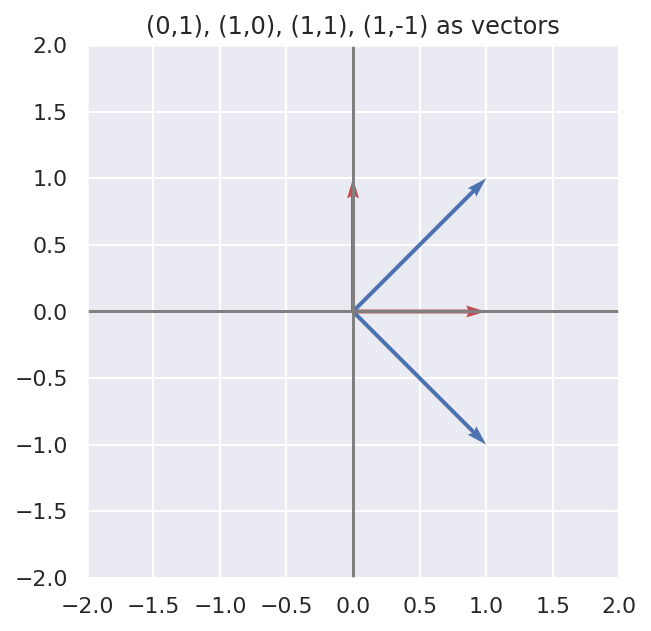

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
ax = plt.gca()
ax.axhline(y=0, color='0.5')
ax.axvline(x=0, color='0.5')
plt.quiver([0, 0], [0, 0], [0, 1], [1, 0], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver([0, 0], [0, 0], [1, 1], [1, -1], angles='xy', scale_units='xy', scale=1, color='b')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.title('(0,1), (1,0), (1,1), (1,-1) as vectors')
ax.set_aspect('equal')

plt.show();

$$\begin{pmatrix}1\\0\end{pmatrix}\cdot\begin{pmatrix}0\\1\end{pmatrix} = 0\qquad
\begin{pmatrix}1\\1\end{pmatrix}\cdot\begin{pmatrix}1\\-1\end{pmatrix} = 0$$

This turns out to hold true in general.  If two vectors are orthogonal, their dot product is zero.  This is actually how orthogonality is _defined_ in more complicated spaces - two vectors are orthogonal if and only if their dot product is zero.  This is so important we'll write it again

$$\vec{a} \cdot \vec{b} = 0 \qquad \iff \qquad \vec{a}\; \mathrm{and}\; \vec{b}\
\mathrm{are\ orthogonal}$$

We actually go one step further, and use this to define the angle between two vectors

$$\vec{a} \cdot \vec{b} = \lVert \vec{a} \lVert\,\lVert \vec{b} \lVert\,\cos(\theta)$$

Why is orthogonality so important?  It's because orthogonal vectors carry independent information from each other, just like our $x$ and $y$ directions.  They are also extremely important in the geometric interpretation, as they define different directions in a space.

## Linear independence


This idea of independent information is more than just vectors being orthogonal.  We say a set of vectors is _linearly independent_ if we can't write any of them as a linear combination of the others.  Orthogonal vectors are automatically linearly independent, but others can be as well.  In general, we say vectors $\{ \vec{v}_0, \ldots, \vec{v}_i, \ldots, \vec{v}_n \}$ are linearly dependent if we can find a set of constants $c_i$, not at equal to 0, such that

$$\sum_i c_i \vec{v}_i = c_0 \vec{v}_0 + c_1 \vec{v}_1 + ... + c_n \vec{v}_n = 0$$

As example of dependent vectors is

$$\begin{pmatrix}1\\1\\1\end{pmatrix} \qquad \begin{pmatrix}1\\1\\-1\end{pmatrix}
\qquad \begin{pmatrix}1\\1\\0\end{pmatrix}$$

since we can sum the first two to produce twice the second, like so:

$$\begin{pmatrix}1\\1\\1\end{pmatrix} + \begin{pmatrix}1\\1\\-1\end{pmatrix} =
\begin{pmatrix}2\\2\\0\end{pmatrix}
= 2\begin{pmatrix}1\\1\\0\end{pmatrix}$$

However, this very similar set is independent.

$$\begin{pmatrix}1\\1\\1\end{pmatrix} \qquad \begin{pmatrix}1\\1\\-1\end{pmatrix}
\qquad \begin{pmatrix}1\\-1\\0\end{pmatrix}$$

In a system with $n$ linearly independent vectors, we can define exactly $n$ orthogonal directions.  This is the _dimension_ of the system (yes, that term is overloaded).  It's a measure of the information content.

### Exercise
1. Can you prove that the following set of vectors are *not* linearly independent?
$$a=\begin{pmatrix}0\\1\\4\end{pmatrix} \qquad b=\begin{pmatrix}1\\0\\1\end{pmatrix}
\qquad c=\begin{pmatrix}-3\\1\\1\end{pmatrix}$$

In practice, we don't try to determine linear independence via inspection. Instead, we calculate the **determinant** of a matrix formed by the vectors. We won't go into how to calculate the determinant by hand but we will discuss how to do so using a Python package.



Linear combinations are obtained by multiplying matrices by scalars, and by adding them together.

In [ ]:
import numpy as np

# Define the vectors
a = np.array([0, 1, 4])
b = np.array([1, 0, 1])
c = np.array([-3, 1, 1])

# Create a matrix with the vectors as its columns
matrix = np.column_stack((a, b, c))
# Calculate the determinant of the matrix
det = np.linalg.det(matrix)
print(det)
# Check if the determinant is zero
if np.isclose(det, 0):
    print("The vectors are linearly dependent.")
else:
    print("The vectors are linearly independent.")

0.0
The vectors are linearly dependent.


## Linear Transformations

We're going to take a small detour for a moment, and talk about linear functions.  We talked about these a little at the beginning - in 1-D they're functions that look like

$$f(x) = a x$$

where $a$ is a constant.  But we can also define them in more dimensions: they'll just take a vector in and we'll get a vector out (they don't need to be the same length).  An example from 3-D to 2-D is

$$\vec{f}(\vec{x}) = \begin{pmatrix}a_x x + a_y y + a_z z\\b_x x + b_y y + b_z z\end{pmatrix}$$

where $a_i$ and $b_i$ are all constants.  But this should look awfully familiar - it's just

$$\begin{pmatrix}a_x&a_y&a_z\\b_x&b_y&b_z\end{pmatrix}\begin{pmatrix}x\\y\\z\end{pmatrix}$$

Any such linear function can be expressed as a matrix - this is, of course, by design, it's how we got them in the first place.  They have a special property, though, that we can take advantage of

$$\vec{f}(\alpha \vec{x} + \beta \vec{y}) = \alpha\,\vec{f}(\vec{x}) +
\beta\,\vec{f}(\vec{y})$$

This property is so fundamental it actually defines what is a linear transformation in general.

### Exercise
1. A 90 degree rotation is a linear transformation; you can express the rotation using the following matrix
$$\mathbf{R} = \begin{pmatrix}0&-1\\1&0\end{pmatrix}.$$
Prove that this transformation is linear using the following two vectors:
$$
\vec{v}_1 = \begin{pmatrix}1\\0\end{pmatrix} \qquad
\vec{v}_2 = \begin{pmatrix}2\\2\end{pmatrix}. \qquad
$$

Linear transformations are functions that send, or map, one vector to another vector. The simplest example of a linear transformation sends each vector to c times itself, where c is some constant. Thus, every vector remains in the same direction, but all lengths are multiplied by c. Another example is a rotation, which leaves all lengths the same but alters the directions of the vectors. Linear refers to the fact that the transformation preserves vector addition and scalar multiplication. This means that if T is a linear transformation sending a vector v to T(v), then for any vectors v and w, and any scalar c, the transformation must satisfy the properties T(v + w) = T(v) + T(w) and T(cv) = cT(v).

When doing computations, linear transformations are treated as matrices. A matrix is a rectangular arrangement of scalars, and two matrices can be added or multiplied.

In [ ]:
import numpy as np

# Define the rotation matrix
R = np.array([[0, -1], [1, 0]])
# Define the vectors v1 and v2
v1 = np.array([1, 0])
v2 = np.array([2, 2])

# Compute the transformations of v1 and v2
v1_transform = np.dot(R, v1)
v2_transform = np.dot(R, v2)

print(v1_transform)
print(v2_transform)

[0 1]
[-2  2]


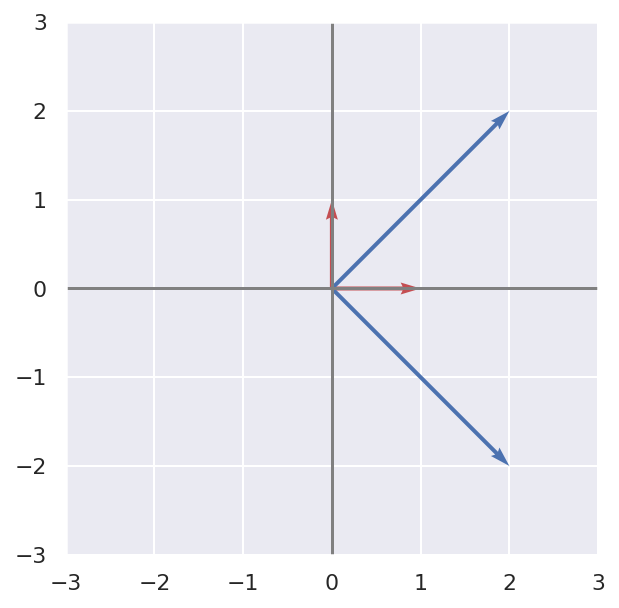

In [ ]:
plt.figure()
ax1 = plt.gca()
ax1.axhline(y=0, color='0.5')
ax1.axvline(x=0, color='0.5')
plt.quiver([0, 0], [0, 0], [1,0], [0,1], angles='xy', scale_units='xy', scale=1, color='r')
plt.quiver([0, 0], [0, 0], [2,2], [-2,2], angles='xy', scale_units='xy', scale=1, color='b')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
ax1.set_aspect('equal')

plt.show();

This Python code defines the rotation matrix RR, computes the transformations of vectors v1v1​ and v2v2​, verifies the 90 degree rotation as shown in plot.

## Eigenvectors and eigenvalues

Every square matrix (i.e. same number of rows as columns) turns out to have special vectors that it doesn't really change.  These are called "eigenvectors" (eigen is German for "own", they're also called "characteristic vectors"), and we define them simply as non-zero vectors where

$$\mathbf{M} \vec{v} = \lambda \vec{v}$$

where $\lambda$ is just a constant, called the _eigenvalue_ for that vector.  Note that multiple vectors can have the same eigenvalue, but if they do, so does any linear combination of them.  Note that these eigenvalues and eigenvectors can be complex numbers, even for a real-valued matrix.  Let's do an example, where we have worked out the eigenvectors beforehand.

$$\begin{pmatrix}1&-1\\1&1\end{pmatrix}\begin{pmatrix}1\\i\end{pmatrix} =
\begin{pmatrix}1-i\\1+i\end{pmatrix} = (1-i)\begin{pmatrix}1\\i\end{pmatrix}\qquad
\begin{pmatrix}1&-1\\1&1\end{pmatrix}\begin{pmatrix}1\\-i\end{pmatrix} =
\begin{pmatrix}1+i\\1-i\end{pmatrix} = (1+i)\begin{pmatrix}1\\-i\end{pmatrix}$$

Every matrix has (at most) as many of these vectors as it has dimensions, and knowing these vectors plus the $\lambda$ for each tells you everything you can know about the matrix.  This "eigensystem" can let you reconstruct the original matrix, but it offers more.  The eigenvectors form a linearly independent set of vectors.  Knowing the eigenvalues lets you calculate many matrix properties easily.  The eigenvectors let you rewrite the matrix in a much simpler form (if there are enough of them).  And these eigenvectors are "fixed points" of the corresponding linear transformation.

There is a general way to compute eigenvalues and eigenvectors, but it's relatively advanced.  For now, we can use a computer program if we need them, but their mere existence actually tells us a lot later on.

### Exercise
1. Determine the corresponding eigenvalue for the matrix $$\begin{pmatrix}2&3\\4&1\end{pmatrix}$$ for the eigenvector $$\begin{pmatrix}7\\7\end{pmatrix}.$$

When studying linear transformations, it is extremely useful to find nonzero vectors whose direction is left unchanged by the transformation. These are called eigenvectors (also known as characteristic vectors). If v is an eigenvector for the linear transformation T, then T(v) = λv for some scalar λ. This scalar is called an eigenvalue. The eigenvalue of greatest absolute value, along with its associated eigenvector, have special significance for many physical applications.

This is because whatever process is represented by the linear transformation often acts repeatedly—feeding output from the last transformation back into another transformation—which results in every arbitrary (nonzero) vector converging on the eigenvector associated with the largest eigenvalue, though rescaled by a power of the eigenvalue. In other words, the long-term behaviour of the system is determined by its eigenvectors.

Finding the eigenvectors and eigenvalues for a linear transformation is often done using matrix algebra

In [ ]:
import numpy as np

# Define the matrix A
A = np.array([[2, 3],
              [4, 1]])
print(A)
# Define the eigenvector v
v = np.array([[7],
              [7]])
print(v)
# Compute the product Av
Av = np.matmul(A, v)
print(Av)

# Find the corresponding eigenvalue
eigenvalue = Av[0] /v[0] # Since the components of Av and v are equal, we just divide the corresponding components
print()
# Print the eigenvalue
print("Corresponding eigenvalue:", eigenvalue)

[[2 3]
 [4 1]]
[[7]
 [7]]
[[35]
 [35]]

Corresponding eigenvalue: [5.]


## NumPy

Many programming languages have very efficient implementations of linear algebra.  Python is no exception.  There are several, but the one we'll use here (and the most common) is NumPy.  We'll introduce the NumPy version of everything we do as we go along, starting with defining a vector and a matrix.

We define a matrix by calling `np.array` on a list (for a vector) or a list-of-lists (for a matrix):

In [ ]:
import numpy as np

m1 = np.array([[2, 3, 4], [7, -1, 9]])
print(m1)
print()
x = np.array([1, 2, 3])
print(x)

[[ 2  3  4]
 [ 7 -1  9]]

[1 2 3]


These objects are of type `ndarray` in NumPy, and each can also tell you its shape:

In [ ]:
print(m1.shape)
print(x.shape)

(2, 3)
(3,)


Note something a little different about the vector here - it only has one dimension.  For vectors, NumPy doesn't make the distinction between a column and a row vector, because it doesn't (usually) need to, it knows what to do.  If we want to be explicit about what we mean, we can use `reshape` to force it to the right dimensions.

In [ ]:
x_row = x.reshape(1,-1)
print(x_row)
print(x_row.shape)
print()

x_col = x.reshape(-1,1)
print(x_col)
print(x_col.shape)

[[1 2 3]]
(1, 3)

[[1]
 [2]
 [3]]
(3, 1)


If we want to select a particular row, or column, or element of our matrix, we use a fairly natural index notation, with the added wrinkle that `:` says "take everything".  It's the same as Python's slicing notation, except we can do multiple indices at the same time.

In [ ]:
#Second row of m1
print(m1[1])
print()

#First column of m1
print(m1[:,0])
print()

#First two rows and two columns of m1
print(m1[0:2,0:2])
print()

#The 1,2 element
print(m1[1,2])

[ 7 -1  9]

[2 7]

[[ 2  3]
 [ 7 -1]]

9


We'll explore more about slicing and indexing later.

### Exercise
1. Consider the various matrices and vectors we have seen previous. Pick one or two and create a NumPy array of the matrix or vector.
1. Reshape the NumPy array. Are there certain set of values that result in an error? Does it make sense that an error results?

In [ ]:
M1 = np.array([
    [2,3,4],
    [7,-1,9]
])
M2 = np.array([
    [1,5],
    [-2,7],
    [9,9]
])
print(M1)
print()
print(M2)

[[ 2  3  4]
 [ 7 -1  9]]

[[ 1  5]
 [-2  7]
 [ 9  9]]


In [ ]:
x_1 = M1.reshape(3,2)
print(x_1)

try:
    x_column = M2.reshape(3,3)
except ValueError as e:
    print("Error occurred:", e)

[[ 2  3]
 [ 4  7]
 [-1  9]]
Error occurred: cannot reshape array of size 6 into shape (3,3)


The error occured in above reshape code as we are trying change the shape of (3,2)  into (3,3) matrix.

## Operations with NumPy arrays

NumPy comes with many built-in mathematical functions that are useful to transform your data. You should use these provided function as they

1. do not require explicitly writing out a `for` loop, and
1. are _vectorized_, taking advantage of how the array is configured in memory for faster computation.

### Universal functions

There are times where we would like to apply an operation to each element of the array. For example, we may want to take the sine of all values, preserving the dimensions of the array. Such functions that operate element-by-element are termed _universal_ functions.

We'll explore some important universal functions that you should take note of, but you can explore the NumPy library yourself to see them all.

In [ ]:
np.sin(m1) # all trig functions available

array([[ 0.90929743,  0.14112001, -0.7568025 ],
       [ 0.6569866 , -0.84147098,  0.41211849]])

In [ ]:
# square root
np.sqrt(m1)

<ipython-input-16-de484ab695aa>:2: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(m1)


array([[1.41421356, 1.73205081, 2.        ],
       [2.64575131,        nan, 3.        ]])

In [ ]:
# natural log
print(np.log(m1))

# base 10 log
print(np.log10(m1))

# base 2 log
print(np.log2(m1))

[[0.69314718 1.09861229 1.38629436]
 [1.94591015        nan 2.19722458]]
[[0.30103    0.47712125 0.60205999]
 [0.84509804        nan 0.95424251]]
[[1.         1.5849625  2.        ]
 [2.80735492        nan 3.169925  ]]


<ipython-input-17-7c6433e52d04>:2: RuntimeWarning: invalid value encountered in log
  print(np.log(m1))
<ipython-input-17-7c6433e52d04>:5: RuntimeWarning: invalid value encountered in log10
  print(np.log10(m1))
<ipython-input-17-7c6433e52d04>:8: RuntimeWarning: invalid value encountered in log2
  print(np.log2(m1))


NumPy has overloaded operators such as `+`, `-`, and `**` to be performed element-wise.

In [ ]:
np.random.seed(17)
array_1 = np.random.rand(10, 2)
array_2 = np.random.rand(10, 2)
array_3 = array_1 + array_2

print(array_3)
print()
print(array_3.shape)

[[0.59239072 1.09209566]
 [0.58756822 0.85660107]
 [1.20546985 0.80023744]
 [0.78842759 0.63084424]
 [0.75710011 0.65013096]
 [1.14445706 0.8914086 ]
 [1.43203322 0.95963028]
 [0.59619224 0.81137736]
 [1.22851375 0.71598552]
 [0.92852469 1.1709706 ]]

(10, 2)


An extensive list of NumPy universal functions can be found [here](https://docs.scipy.org/doc/numpy/reference/ufuncs.html#math-operations).

### Exercise
1. Create two NumPy arrays and add them together. What happens when you try to add two incompatible arrays.

In [ ]:
import numpy as np

# Creating two NumPy arrays
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[5, 6], [7, 8]])

# Adding the arrays together
result = array1 + array2

print("Result of adding the arrays:")
print(result)

# Trying to add two incompatible arrays
array3 = np.array([[1, 2], [3, 4]])
array4 = np.array([[5, 6, 7], [8, 9, 10]])

try:
    result2 = array3 + array4
except ValueError as e:
    print("Error occurred:", e)

Result of adding the arrays:
[[ 6  8]
 [10 12]]
Error occurred: operands could not be broadcast together with shapes (2,2) (2,3) 


As, seen above in example if we add two incompatible arrays it throws error as both the size of array are incompitable.

### Matrix multiplication

In NumPy, matrix multiplication is achieved with `matmul`, or equivalently the `@` operator. Note that the normal multiplication symbol `*` does something quite different, which we won't address here.

In [ ]:
m2 = np.array([[1, 5], [-2, 7], [9, 9]])

print(np.matmul(m1, m2))
print()
print(m2 @ m1)

[[ 32  67]
 [ 90 109]]

[[ 37  -2  49]
 [ 45 -13  55]
 [ 81  18 117]]


### Exercise
1. Create two NumPy arrays and multiply them. What happens when you try to multiply two incompatible arrays.

In [ ]:
import numpy as np

# Creating two NumPy arrays
array1 = np.array([[1, 2], [3, 4]])
array2 = np.array([[5, 6], [7, 8]])

# Multiplying the arrays
result = array1 * array2

print("Result of multiplying the arrays:")
print(result)

# Trying to multiply two incompatible arrays
array3 = np.array([[1, 2], [3, 4]])
array4 = np.array([[5, 6, 7], [8, 9, 10]])

try:
    result2 = array3 * array4
except ValueError as e:
    print("Error occurred:", e)

Result of multiplying the arrays:
[[ 5 12]
 [21 32]]
Error occurred: operands could not be broadcast together with shapes (2,2) (2,3) 


When we try to multiply two incompatible arrays, it shows error as the shapes would be incompatible.

### Transpose and determinant

In NumPy, we get the transpose with either `np.transpose` or `.T`, and the scalar product of two vectors by simply calling `dot`. Since vectors in NumPy aren't aware of whether they are row or column vectors, we don't need to bother with the transpose (also, it doesn't do anything on vectors).

In [ ]:
print(np.transpose(m1))
print()
print(m2.T)
print()

[[ 2  7]
 [ 3 -1]
 [ 4  9]]

[[ 1 -2  9]
 [ 5  7  9]]



As discussed previously, determining linear independence is difficult to do via inspection. Even calculating the determinant becomes difficult as the dimensions of the matrix gets bigger. Luckily, we can use NumPy to calculate the determinant of a matrix.

In [ ]:
A = np.array([[0, 1, -3], [1, 0, 1], [4, 1, 1]])
print("Not linearly independent")
print(A)
print(np.linalg.det(A))
print()

B = np.array([[0, 1, 1], [1, 0, 1], [4, 1, 1]])
print("Linearly independent")
print(B)
print(np.linalg.det(B))

Not linearly independent
[[ 0  1 -3]
 [ 1  0  1]
 [ 4  1  1]]
0.0

Linearly independent
[[0 1 1]
 [1 0 1]
 [4 1 1]]
4.0


The determinant is a special number that can be calculated from a matrix.

The matrix has to be square (same number of rows and columns) like this one:
38 46

A Matrix
(This one has 2 Rows and 2 Columns)

Let us calculate the determinant of that matrix:

3×6 − 8×4
= 18 − 32
= −14

## Performance improvements

When used correctly, NumPy's performance will be significantly faster than ordinary Python code. It isn't that ordinary Python code is anything less than awesome; it is because NumPy adds certain constraints to the data structures that enable faster computations.

Let's construct a list of lists of numbers to represent a matrix.

In [ ]:
def make_matrix(n_rows, n_cols):
    return [list(range(n_cols*i, n_cols*(i + 1))) for i in range(n_rows)]

test_data = make_matrix(400, 10)
test_data

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
 [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
 [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
 [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
 [90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
 [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
 [110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
 [120, 121, 122, 123, 124, 125, 126, 127, 128, 129],
 [130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
 [140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
 [150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
 [160, 161, 162, 163, 164, 165, 166, 167, 168, 169],
 [170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
 [180, 181, 182, 183, 184, 185, 186, 187, 188, 189],
 [190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
 [200, 201, 202, 203, 204, 205, 206, 207, 208, 209

We can index into this nested data structure in the usual manner:

In [ ]:
test_data[3][2]

32

If we want to calculate the sum of all the numbers, we can do that with a list comprehension.

In [ ]:
%%timeit

sum([sum(r) for r in test_data])

68.5 µs ± 431 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Now let's put the same data into a NumPy array data structure. We can do that with as follows:

In [ ]:
test_np_array = np.array(test_data)

In [ ]:
%%timeit

test_np_array.sum()

3 µs ± 74.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Not only is it easier to calculate the sum, simply calling the `sum` method, but it is faster. Further, there are bigger performance improvements if we make the test data larger. But why is it faster?

The most important reason is that Python allows the lists to contain general (object) data types. NumPy limits us to one data type. The array we created is limited to integers. Further, by restricting each entry of the array to be the same data type, the array is stored in memory using a contiguous block of memory as it would be for arrays in the C programming language. Note that C-style arrays are good for more than just quickly performing operations through Python; they're also good for talking to existing C and Fortran code. This interoperability explains why NumPy matters to you even if you won't do any matrix computations by hand: many of the libraries that you _will_ want to use will use NumPy arrays under the hood.

### Exercise
1. Increase the size of the test array we used to benchmark the performance. How does the performance gain of NumPy change as we increase the size of the array?

In [ ]:
test_1 = make_matrix(900,10)
test_1

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
 [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
 [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
 [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
 [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
 [90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
 [100, 101, 102, 103, 104, 105, 106, 107, 108, 109],
 [110, 111, 112, 113, 114, 115, 116, 117, 118, 119],
 [120, 121, 122, 123, 124, 125, 126, 127, 128, 129],
 [130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
 [140, 141, 142, 143, 144, 145, 146, 147, 148, 149],
 [150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
 [160, 161, 162, 163, 164, 165, 166, 167, 168, 169],
 [170, 171, 172, 173, 174, 175, 176, 177, 178, 179],
 [180, 181, 182, 183, 184, 185, 186, 187, 188, 189],
 [190, 191, 192, 193, 194, 195, 196, 197, 198, 199],
 [200, 201, 202, 203, 204, 205, 206, 207, 208, 209

In [ ]:
test_1[3][2]

32

In [ ]:
%%timeit

sum([sum(r) for r in test_1])

184 µs ± 48.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
test_np_array = np.array(test_1)

In [ ]:
%%timeit

test_np_array.sum()

4.18 µs ± 92.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


As, seen above with the increase in test data to 900, there was a little difference in performance or performance delay as the last test took longer time with more data.

## Array indexing

As demonstrated above, we can index into a NumPy array using the square brackets [ ]. This is slightly different from regular Python indexing in that one pair of brackets can be used for indexing in multiple dimensions.

In [ ]:
# Indexing into Python list of lists
print(test_data[3][4])

# Indexing into NumPy array
print(test_np_array[3, 4])

34
34


We can inspect and modify the shape of a NumPy array. This will also alter the array's indexing.

In [ ]:
small_array = np.random.rand(12)

small_array.shape

(12,)

In [ ]:
small_array

array([0.79726773, 0.06797873, 0.96078776, 0.65920539, 0.71877608,
       0.74357677, 0.88773635, 0.13394567, 0.77697458, 0.83799151,
       0.82930476, 0.029157  ])

In [ ]:
small_array.shape = (4, 3)

small_array

array([[0.79726773, 0.06797873, 0.96078776],
       [0.65920539, 0.71877608, 0.74357677],
       [0.88773635, 0.13394567, 0.77697458],
       [0.83799151, 0.82930476, 0.029157  ]])

We can access a subset of the array if we wish:

In [ ]:
smaller_array = small_array[1:, 2:]

smaller_array

array([[0.74357677],
       [0.77697458],
       [0.029157  ]])

This can also be used in assignments.

In [ ]:
smaller_array[1:] = 42

smaller_array

array([[ 0.74357677],
       [42.        ],
       [42.        ]])

We changed `smaller_array`. What about the data in `small_array`?

In [ ]:
small_array

array([[ 0.79726773,  0.06797873,  0.96078776],
       [ 0.65920539,  0.71877608,  0.74357677],
       [ 0.88773635,  0.13394567, 42.        ],
       [ 0.83799151,  0.82930476, 42.        ]])

The original array changed also! But why?

The smaller array shares the memory space with the original array. The memory overlaps. Changes to one will be reflected in the other. NumPy was designed to do this for performance reasons.

If that's not what you need, use the `copy` method.

In [ ]:
small_array_copy = small_array.copy()

In [ ]:
small_array[[0, -1], :]

array([[ 0.79726773,  0.06797873,  0.96078776],
       [ 0.83799151,  0.82930476, 42.        ]])

### Exercise

1. Select row 1 of `small_array`.
1. Select only the last two rows of column 1 of `small_array`.
1. Select all values of row 0 and 3 of `smal_array`. Hint: you can use a list to specify want indices you want for a row or a column.

In [ ]:
# Selecting row 1 of small_array
row_1 = small_array[1]
print("Row 1 of small_array:", row_1)

Row 1 of small_array: [0.65920539 0.71877608 0.74357677]


In [ ]:
# Selecting only the last two rows of column 1 of small_array
last_two_rows_col_1 = small_array[-2:, 1]
print("Last two rows of column 1 of small_array:", last_two_rows_col_1)

Last two rows of column 1 of small_array: [0.13394567 0.82930476]


In [ ]:
# Selecting all values of row 0 and 3 of small_array
rows_0_and_3 = small_array[[0, 3]]
print("Rows 0 and 3 of small_array:")
print(rows_0_and_3)

Rows 0 and 3 of small_array:
[[ 0.79726773  0.06797873  0.96078776]
 [ 0.83799151  0.82930476 42.        ]]
